In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

In [88]:
w = tf.Variable(tf.initializers.TruncatedNormal()(shape=[784, 100], dtype=tf.float64), name='w')
n = tf.Variable(tf.initializers.TruncatedNormal()(shape=[100,], dtype=tf.float64), name='n')
w1 = tf.Variable(tf.initializers.TruncatedNormal()(shape=[100, 10], dtype=tf.float64), name='w1')
n1 = tf.Variable(tf.initializers.TruncatedNormal()(shape=[10,], dtype=tf.float64), name='n1')

@tf.function
def base_model(data):
    return tf.nn.relu(data @ w + n) @ w1 + n1

def create_batch(batch_num):
    for bn in range(batch_num):
        yield x_train[bn:bn+batch_size], y_train[bn:bn+batch_size]

In [89]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = np.reshape(x_train, (-1, 784))/255.0, np.reshape(x_test, (-1, 784))/255.0
y_train, y_test = tf.one_hot(y_train, 10), tf.one_hot(y_test, 10)

In [90]:
batch_num = 120
batch_size = 500
trainable_variables = [w, n, w1, n1]

cross_entropy = tf.keras.losses.CategoricalCrossentropy()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
accuracy = tf.keras.metrics.CategoricalAccuracy()

@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = tf.nn.softmax(base_model(inputs))
        loss = cross_entropy(labels, predictions)
    gradients = tape.gradient(loss, trainable_variables)
    opt.apply_gradients(zip(gradients, trainable_variables))

In [91]:
EPOCHS = 3
accuracy_history = []

for epoch in range(EPOCHS):
    for x_train_batch, y_train_batch in create_batch(batch_num):
        train_step(x_train_batch, y_train_batch)
        prediction = tf.argmax(tf.nn.softmax(base_model(x_test)), axis=-1)
        answers = tf.argmax(y_test, axis=-1)
        accuracy.update_state(answers, prediction)
        accuracy_history.append(accuracy.result().numpy())

In [92]:
prediction = prediction.numpy()

In [93]:
answers = answers.numpy()

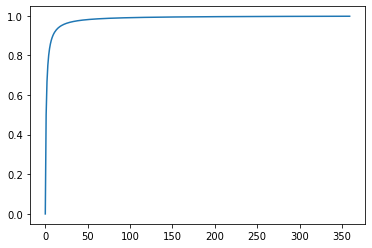

In [94]:
plt.plot(accuracy_history)

Text(0.5, 1.0, 'Correct 5; Predicted 4')

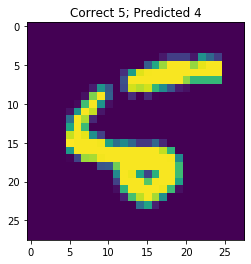

In [95]:
sample_num = 0
plt.imshow(x_test[prediction!=answers][sample_num].reshape(28, 28))
plt.title(r"Correct {0}; Predicted {1}".format(answers[prediction!=answers][sample_num],
                                               prediction[prediction!=answers][sample_num]))